In [2]:
# imports
import re
import ast
import time
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import os
from pandas import ExcelWriter
from pandas import ExcelFile

In [43]:
#Load in the data
df = pd.read_excel('/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data-version-2.xlsx', sheetname='output')

### Exploratory Data Analysis

In [4]:
print("Column headings:")
print(df.columns)

Column headings:
Index(['age', 'gender', 'racecaucasian', 'raceblack', 'raceasian',
       'racenativeam', 'racnativepacific', 'raceother', 'ethnicity', 'surgdt',
       ...
       'cotother', 'Readmit', 'ReadmitDt', 'readmrsn', 'cnstroktrind',
       'CNStrokT', 'drgnum', 'BldRBC', 'predstro', 'predrenf'],
      dtype='object', length=407)


In [5]:
df.head()

,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,surgdt,...,cotother,Readmit,ReadmitDt,readmrsn,cnstroktrind,CNStrokT,drgnum,BldRBC,predstro,predrenf
0,54,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-01,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.014,0.048
1,65,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-02,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.017,0.069
2,83,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-04,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.045,0.148
3,59,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-05,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.013,0.074
4,72,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-06,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.016,0.019


There are 42,746 records in this dataset. There are 466 columns.

From the below summary, we can see patients tend to be middle-aged, male, and white

In [44]:
df.loc[df['complics']==2,['coprebld','coprebldtim', 'copregft','CReintMI','CReintMIVes','CReintMIIntTy','CAortReint','CAortReintTy','copreoth','coprenon','csepsis','csepsispbc','cnstrokp','cnstrokttia','cncomaenceph','CNEnceph','cncoma','cnparal','cnparesis','CNParesisTy','cpvntlng','cppneum','cvte','pulmemb','dvt','crenfail','crendial','dialdur','DialStat','cultrafil','cotarrst','CVaAoDisTy','cotcoag','cottamp','cotgi','COtLiver','cotmsf','cotafib','cotother']] =2 

In [45]:
subset = df.filter(items = ['coprebld','coprebldtim', 'copregft','CReintMI','CReintMIVes','CReintMIIntTy','CAortReint','CAortReintTy','copreoth','coprenon','csepsis','csepsispbc','cnstrokp','cnstrokttia','cncomaenceph','CNEnceph','cncoma','cnparal','cnparesis','CNParesisTy','cpvntlng','cppneum','cvte','pulmemb','dvt','crenfail','crendial','dialdur','DialStat','cultrafil','cotarrst','CVaAoDisTy','cotcoag','cottamp','cotgi','COtLiver','cotmsf','cotafib','cotother']) 

In [46]:
subset.fillna(2, inplace = True)

In [48]:
df.iloc[:,359:397] = subset.iloc[:,:]

In [51]:
df.to_excel("/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data_filled_in_complication_data.xlsx",sheet_name='output')

In [6]:
df.describe()

,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,heightcm,...,cotafib,cotother,Readmit,readmrsn,cnstroktrind,CNStrokT,drgnum,BldRBC,predstro,predrenf
count,42746.000000,42743.000000,42299.000000,42298.000000,42299.000000,42299.000000,42298.000000,42272.000000,42718.000000,42744.000000,...,19261.000000,19261.000000,18781.000000,5080.00000,0.0,0.0,0.0,0.0,42743.000000,41692.000000
mean,66.186497,1.293896,1.098324,1.927893,1.990118,1.995555,1.998605,1.990254,2.031743,171.461597,...,1.354810,1.892633,1.891539,349.84252,NaN,NaN,NaN,NaN,0.014555,0.045228
std,10.914178,0.455550,0.297756,0.258669,0.098917,0.066520,0.037322,0.098243,0.253955,10.755193,...,0.478468,0.309588,0.332165,468.75638,NaN,NaN,NaN,NaN,0.011728,0.055454
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.500000,...,1.000000,1.000000,1.000000,2.00000,NaN,NaN,NaN,NaN,0.001000,0.002000
25%,59.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,165.000000,...,1.000000,2.000000,2.000000,3.00000,NaN,NaN,NaN,NaN,0.007000,0.014000
50%,67.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,172.700000,...,1.000000,2.000000,2.000000,22.00000,NaN,NaN,NaN,NaN,0.011000,0.026000
75%,74.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178.000000,...,2.000000,2.000000,2.000000,998.00000,NaN,NaN,NaN,NaN,0.019000,0.054000
max,98.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,223.500000,...,2.000000,2.000000,3.000000,999.00000,NaN,NaN,NaN,NaN,0.213000,0.886000


Next, let's examine how sparse our dataset is.

In [89]:
df_missing = df.isnull().mean().round(4) * 100
df_missing = df_missing.to_frame()
df_missing.columns = ['% null']

In [90]:
df_missing.head()

,% null
hospitalID,0.00
age,0.00
gender,0.01
racecaucasian,1.05
raceblack,1.05


Although the figure below is hard to read due to the number of variables, we can see perhaps roughly half of the variables contain few to no missing values. Many of the remaining variables see upwards of 50% missing values while a decent fraction see close to or perhaps even 100% missing values

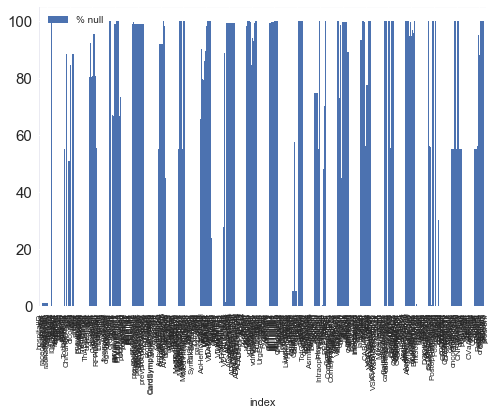

In [91]:
#Show % null values by variable

plt.figure(figsize=(4,4))
df_missing.reset_index().plot(kind='bar', x= 'index', y='% null')
plt.show()

Examing our outcome variable, we can see the vast majority of patients we have data on do not suffer from stroke post-operation.

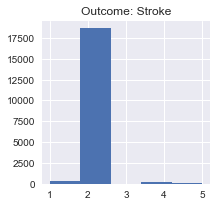

In [29]:
#Show distribution of outcome variable

df['cnstrokp'].hist(figsize=(3,3),bins=5)
plt.title('Outcome: Stroke')
plt.show()

#Code Value
#3 Yes, hemorrhagic
#4 Yes, ischemic
#5 Yes, undetermined type
#2 No

Unfortunately, we lack data on most patients

In [97]:
df['cnstrokp'].isnull().sum()

23484

In [93]:
### EDA ideas

# Heatmap to get correlations between features
# Histograms to get feature distributions
# Plots of relationship between outcome variable and features

From the below heatmap, there appear to be some variables that correlate with others (horizontal or vertical lines). Most of the variables show no correlation or have no data present

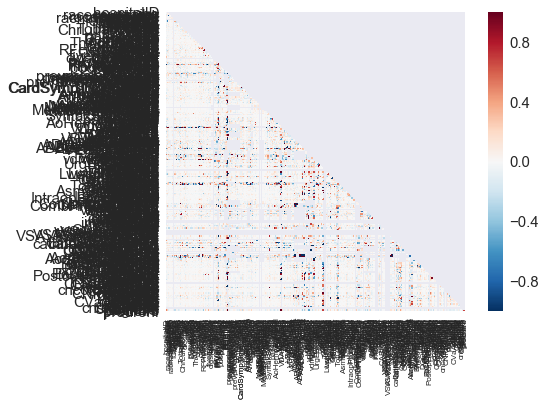

In [96]:
# correlation heatmap for numerical independent variables
nfv_values_corr = df.corr()
mask = np.zeros_like(nfv_values_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(nfv_values_corr,  mask = mask, square = True)
plt.show()

In [100]:
sns.pairplot(df.dropna())
plt.show()

KeyboardInterrupt: 